In [7]:
"""
Example use of LB.py as a Lattice Boltzmann simulation with streaming and collision 
"""
from IPython import display
import numpy as np 
from LB import LB

In [8]:
%%capture
# creating an LB object and set some parameters (see default values in LB.py)
lb = LB()
lb.omega = 1
lb.Nx, lb.Ny = (50,50)
lb.F = np.ones((50,50,9))
# exemplary setting one value higher in the center to see if streaming/colliding works  
lb.F[24,24,5] = 1.1
lb.F[24,24,1] = 1.1
lb.fitParams()  

SAVE_EVERY = 1 

def simulate(timesteps=1000, showDensityPlot=True, showVelocityPlot=False):

  for i in range(timesteps):

    # apply drift/stream
    lb.streaming()

    # Recalc local variables 
    rho = lb.calculateDensity()
    ux, uy  = lb.calculateVelocity()

    # apply collision
    lb.collision()
  
    if showDensityPlot:
      if i % SAVE_EVERY == 0:
          lb.updateDensityFigure(rho, timestep = i)
          display.display(lb.densityFig)
          display.clear_output(wait=True)
          
    if showVelocityPlot:
      if i % SAVE_EVERY == 0:
        lb.updateVelocityFigure(ux,uy, timestep = i)
        display.display(lb.velocityFig)
        display.clear_output(wait=True)



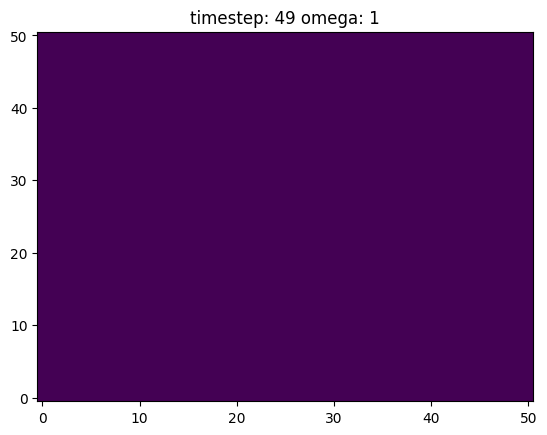

In [9]:
simulate(timesteps=50, showDensityPlot=True)